In [1]:
import matplotlib.pyplot as plt
from sympy import Ellipse, Point, S,pi,plot_implicit,Eq,tan

# Занятие 15
# Алгебра

## Кривые второго порядка на плоскости: гипербола и парабола

https://ru.wikipedia.org/wiki/%D0%9F%D0%B0%D1%80%D0%B0%D0%B1%D0%BE%D0%BB%D0%B0
https://ru.wikipedia.org/wiki/%D0%93%D0%B8%D0%BF%D0%B5%D1%80%D0%B1%D0%BE%D0%BB%D0%B0_(%D0%BC%D0%B0%D1%82%D0%B5%D0%BC%D0%B0%D1%82%D0%B8%D0%BA%D0%B0)
### Кривые: класс Curve в SymPy 

В SymPy пока нет классов Гипербола и Парабола, создадим их прототипы сами.
Возьмем за образец класс эллипсов
https://github.com/sympy/sympy/blob/70381f282f2d9d039da860e391fe51649df2779d/sympy/geometry/ellipse.py#L38-L1478
https://docs.sympy.org/latest/modules/geometry/ellipses.html?highlight=ellipse#sympy.geometry.ellipse.Ellipse

Реализуем следующие атрибуты:




In [2]:
from sympy import Expr, Eq, latex,S,plot_implicit
from sympy.core import S, pi, sympify
from sympy.core.evaluate import global_evaluate
from sympy.core.logic import fuzzy_bool
from sympy.core.numbers import Rational, oo
from sympy.core.compatibility import ordered
from sympy.core.symbol import Dummy, _uniquely_named_symbol, _symbol
from sympy.simplify import simplify, trigsimp
from sympy.functions.elementary.miscellaneous import sqrt, Max
from sympy.functions.elementary.trigonometric import cos, sin
from sympy.functions.special.elliptic_integrals import elliptic_e
from sympy.geometry.exceptions import GeometryError
from sympy.geometry.line import Ray2D, Segment2D, Line2D, LinearEntity3D
from sympy.polys import DomainError, Poly, PolynomialError
from sympy.polys.polyutils import _not_a_coeff, _nsort
from sympy.solvers import solve
from sympy.solvers.solveset import linear_coeffs
from sympy.utilities.misc import filldedent, func_name

from sympy.geometry.entity import GeometryEntity, GeometrySet
from sympy.geometry.point import Point, Point2D, Point3D
from sympy.geometry.line import Line, Segment
from sympy.geometry.util import idiff

import random

In [3]:
class Hyperbola(GeometrySet):
    """
     Attributes
    ==========
    center
    hradius
    vradius
    eccentricity
    periapsis
    focus_distance
    foci
    ==========
    конструктор __new__
    скопирован из Эллипса,
    изменена формула для  hradius и vradius через эсцентриситет
    """
    def __new__(
        cls, center=None, hradius=None, vradius=None, eccentricity=None, **kwargs):
        hradius = sympify(hradius)
        vradius = sympify(vradius)

        eccentricity = sympify(eccentricity)

        if center is None:
            center = Point(0, 0)
        else:
            center = Point(center, dim=2)

        if len(center) != 2:
            raise ValueError('The center of "{0}" must be a two dimensional point'.format(cls))

        if len(list(filter(lambda x: x is not None, (hradius, vradius, eccentricity)))) != 2:
            raise ValueError(filldedent('''
                Exactly two arguments of "hradius", "vradius", and
                "eccentricity" must not be None.'''))

        if eccentricity is not None:
            if hradius is None:
                hradius = vradius / sqrt( eccentricity**2-1)
            elif vradius is None:
                vradius = hradius * sqrt( eccentricity**2-1)

        if hradius == 0:
            return "Line"
        if vradius == 0:
            return "Rays"
        return GeometryEntity.__new__(cls, center, hradius, vradius, **kwargs)
    @property
    def ambient_dimension(self):
        return 2
    @property
    def center(self):
        return self.args[0]

    @property
    def hradius(self):
        return self.args[1]
    @property
    def vradius(self):
        return self.args[2]
    @property
    def focus_distance(self):
        return sqrt(self.hradius**2+ self.vradius**2)
    @property
    def eccentricity(self):
        """The eccentricity of the ellipse."""
        return self.focus_distance / self.hradius
    @property
    def periapsis(self):
        """The apoapsis of the hyperbola.
        The smallest distance between the focus and the contour."""
        return self.focus_distance-self.hradius
    @property
    def foci(self):
        return (self.center + Point(0, -self.focus_distance), self.center + Point(0, self.focus_distance))
    @property
    def major(self):
        return self.hradius
    @property
    def minor(self):
        return self.vradius
    
    def equation(self, x='x', y='y', _slope=None,equation=False):
        """
        Returns the equation of a hyperbola aligned with the x and y axes;
        when slope is given, the equation returned corresponds to a hyperbola 
        with a major axis having that slope.
        Parameters
        ==========
        x : str, optional
            Label for the x-axis. Default value is 'x'.
        y : str, optional
            Label for the y-axis. Default value is 'y'.
        _slope : Expr, optional
                The slope of the major axis. Ignored when 'None'.
        Returns
        =======
        equation : sympy expression   """

        x = _symbol(x, real=True)
        y = _symbol(y, real=True)

        dx = x - self.center.x
        dy = y - self.center.y

        if _slope is not None:
            L = (dy - _slope*dx)**2
            l = (_slope*dy + dx)**2
            h = 1 + _slope**2
            a = h*self.major**2
            b = h*self.minor**2
            res= l/a - L/b 

        else:
            t1 = (dx/self.hradius)**2
            t2 = (dy/self.vradius)**2
            res= t1 - t2 
        if equation==False:
            return   res-1
        else:
            return Eq(res,1)
        

Построим нашу первую гиперболу, полуоси 2 и 3

In [4]:
Hyp1 = Hyperbola(Point(0, 0), hradius=2, vradius=3)
Hyp1

Hyperbola(Point2D(0, 0), 2, 3)

Теперь построим гиперболу по горизонтальной полуоси и эксцентриситету

In [5]:
Hyp2 = Hyperbola(Point(0, 1), hradius=8, eccentricity=S(5)/4)
Hyp2

Hyperbola(Point2D(0, 1), 8, 6)

Заметим, что vradius автоматически корректно вычислен при построении по формуле $b=a\sqrt{\varepsilon^2-1}$

### Атрибуты класса Hyperbola

#### center 
центр  точка пересечения асимптот гиперболы
	

#### hradius
горизонтальная полуось
    
#### vradius
вертикальная полуось	

#### eccentricity
эксцентриситет отношение фокусного расстояния к горизонтальной оси (той, на которой расположены фокусы)	

#### periapsis
перифокусное расстояние (минимальное расстояние от фокуса до точки на эллипсе)	


#### focus_distance
фокусное расстояние - половина расстояния между фокусами	

#### foci
фокусы 

In [6]:
list_props=[Hyp2.center,Hyp2.hradius,Hyp2.vradius,Hyp2.eccentricity,Hyp2.periapsis,Hyp2.focus_distance,Hyp2.foci]
list_props_names=['center','hradius','vradius','eccentricity','periapsis','focus_distance','foci']

for i in range(len(list_props)):
    print((list_props_names[i],list_props[i]))

('center', Point2D(0, 1))
('hradius', 8)
('vradius', 6)
('eccentricity', 5/4)
('periapsis', 2)
('focus_distance', 10)
('foci', (Point2D(0, -9), Point2D(0, 11)))


### Методы класса Hyperbola 

equation(x='x', y='y', _slope=None)- уравнение гиперболы

необязательный аргумент _slope - наклон главной оси

In [7]:
Hyp2.equation()

x**2/64 - (y/6 - 1/6)**2 - 1

In [8]:
Hyp2.equation(equation=True)

Eq(x**2/64 - (y/6 - 1/6)**2, 1)

In [9]:
Hyp2.equation(_slope=2,equation=True)

Eq(-(-2*x + y - 1)**2/180 + (x + 2*y - 2)**2/320, 1)

Изобразим графики обеих гипербол, исходной и повернутой:

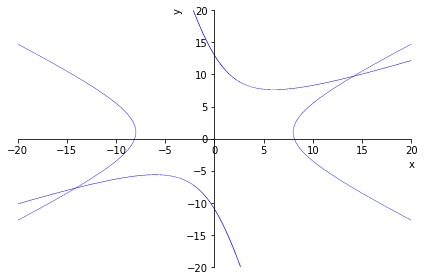

In [10]:
EQ0=Hyp2.equation()
x,y=sorted(list(EQ0.free_symbols),key=str)
p0=plot_implicit(EQ0,(x,-20,20),(y,-20,20),show=False)
p0.append(plot_implicit( Hyp2.equation(_slope=2),(x,-20,20),(y,-20,20),show=False)[0])
p0.show()

Введите натуральное нечетное число до 9
5


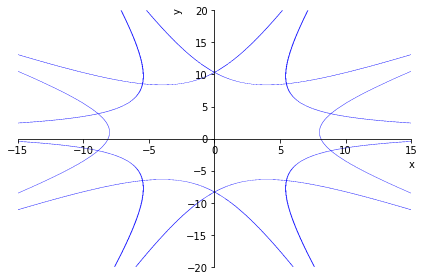

In [11]:
EQ0=Hyp2.equation()
x,y=sorted(list(EQ0.free_symbols),key=str)
p0=plot_implicit(EQ0,(x,-15,15),(y,-20,20),show=False)
n=int(input('Введите натуральное нечетное число до 9\n'))
for i in range(1,n):
    p0.append(plot_implicit(Hyp2.equation(_slope=tan(i*pi/n)),(x,-15,15),(y,-20,20),show=False)[0])
p0.show()

### Изобразим график гиперболы
Используем в легенде возможность выводить по столбцам 

plt.legend(loc='upper left',ncol=2, mode="expand")

ncol - количество столбцов

mode="expand" - легенда растягивается по ширине графика

Для автоматического формирования красивой подписи в легенде используем

dir1='директриса x=$'+latex(S(a**2)/c)+'$'

превращение $a**2$ в символ с помощью $S(a**2)$ предотвращает округление

Избежать налезания легенды на график можно регулировкой пределов по осям:

plt.ylim(-10,18)

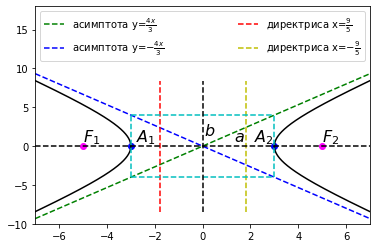

In [12]:
import matplotlib.pyplot as plt
from sympy.abc import x,a,b
%matplotlib inline
a=3
b=4
c=S(sqrt(a**2+b**2))
X1=[a+i/100 for i in range(400)]
X2=[-a-i/100 for i in range(400)]
Y11=[b/a*(x**2-a**2)**(1/2) for x in X1]
Y12=[-y for y in Y11]
Y21=[b/a*(x**2-a**2)**(1/2) for x in X1]
Y22=[-y for y in Y11]
ymax=max(Y11)
ymin=-ymax
plt.plot(X1,Y11,'k')
plt.plot(X1,Y12,'k')
plt.plot(X2,Y21,'k')
plt.plot(X2,Y22,'k')
asympt1='асимптота y=$'+latex(S(b)/a*x)+'$'
asympt2='асимптота y=$'+latex(-S(b)/a*x)+'$'
plt.plot([-7,7],[-7*b/a,7*b/a],'g--',label=asympt1)
plt.plot([-7,7],[7*b/a,-7*b/a],'b--',label=asympt2)
dir1='директриса x=$'+latex(S(a**2)/c)+'$'
dir2='директриса x=$-'+latex(S(a**2)/c)+'$'
plt.plot([-a**2/c,-a**2/c],[ymin,ymax],'r--',label=dir1)
plt.plot([a**2/c,a**2/c],[ymin,ymax],'y--',label=dir2)
plt.plot([-a,-a],[-b,b],'c--')
plt.plot([a,a],[-b,b],'c--')
plt.plot([-a,a],[-b,-b],'c--')
plt.plot([-a,a],[b,b],'c--')
plt.plot([-7,7],[0,0],'k--')
plt.plot([0,0],[ymin,ymax],'k--')
plt.scatter(-c,0,color='magenta')
plt.scatter(c,0,color='magenta')
plt.scatter(-a,0,color='blue')
plt.scatter(a,0,color='blue')

plt.annotate(r'$F_1$',xy=(-c,0), xycoords='data',xytext=(0, +5), textcoords='offset points', fontsize=16)
plt.annotate(r'$F_2$',xy=(c,0), xycoords='data',xytext=(0, +5), textcoords='offset points', fontsize=16)
plt.annotate(r'$A_1$',xy=(-a,0), xycoords='data',xytext=(+5, +5), textcoords='offset points', fontsize=16)
plt.annotate(r'$A_2$',xy=(a,0), xycoords='data',xytext=(-20, +5), textcoords='offset points', fontsize=16)
plt.annotate(r'$a$',xy=(a,0), xycoords='data',xytext=(-40, +5), textcoords='offset points', fontsize=16)
#plt.axis('equal')
plt.xlim(-7,7)
plt.ylim(-10,18)
plt.annotate(r'$b$',xy=(0,b), xycoords='data',xytext=(+1, -20), textcoords='offset points', fontsize=16)
plt.legend(loc='upper left',ncol=2, mode="expand")
